Tải file thành công!

--- Thống kê cơ bản cho các cột dữ liệu số ---
          Trung bình (Mean)  Trung vị (Median)  Phương sai (Variance)  \
Price          3.942673e+04            27977.0           8.549470e+08   
Open           3.942708e+04            28018.0           8.558446e+08   
High           3.987390e+04            28348.0           8.726748e+08   
Low            3.897303e+04            27680.0           8.374701e+08   
Vol.           7.845799e+06          1860000.0           2.120931e+14   
Change %       9.330456e-04                0.0           3.568677e-04   

          Độ lệch chuẩn (Std. Dev)  
Price                 2.923948e+04  
Open                  2.925482e+04  
High                  2.954107e+04  
Low                   2.893907e+04  
Vol.                  1.456342e+07  
Change %              1.889094e-02  

--- Đang hiển thị các biểu đồ... ---

Biểu đồ 1: Phân phối giá đóng cửa


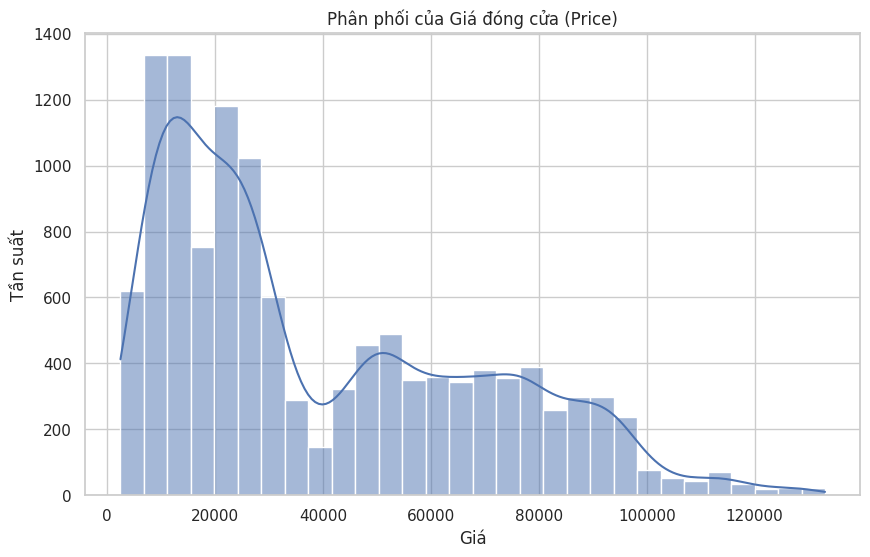


Biểu đồ 2: So sánh giá giữa các mã cổ phiếu


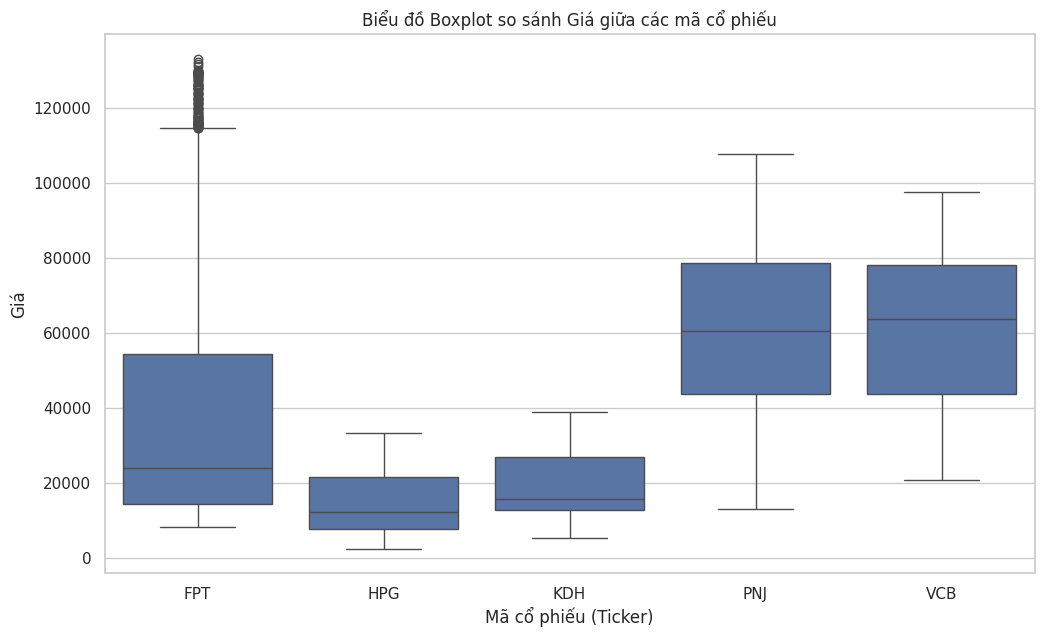


Biểu đồ 3: Mối quan hệ giữa Giá và Khối lượng giao dịch


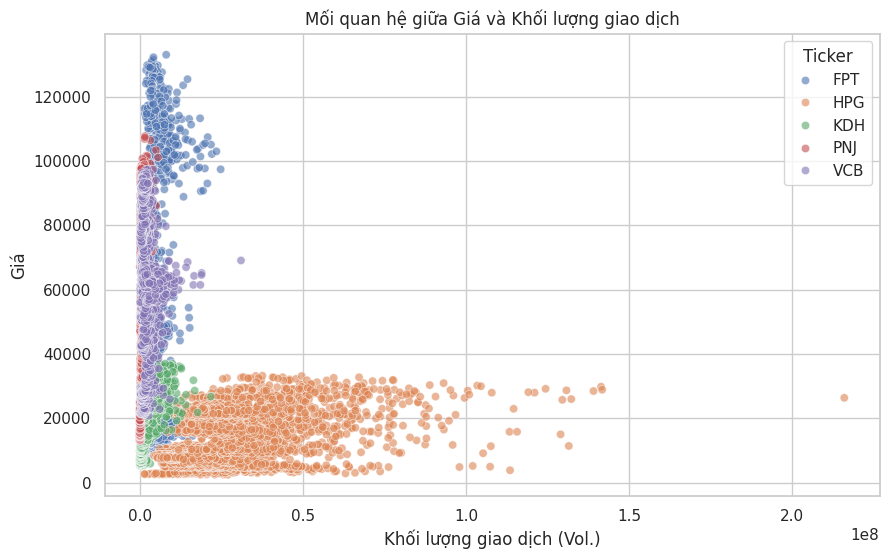


Biểu đồ 4: Ma trận tương quan


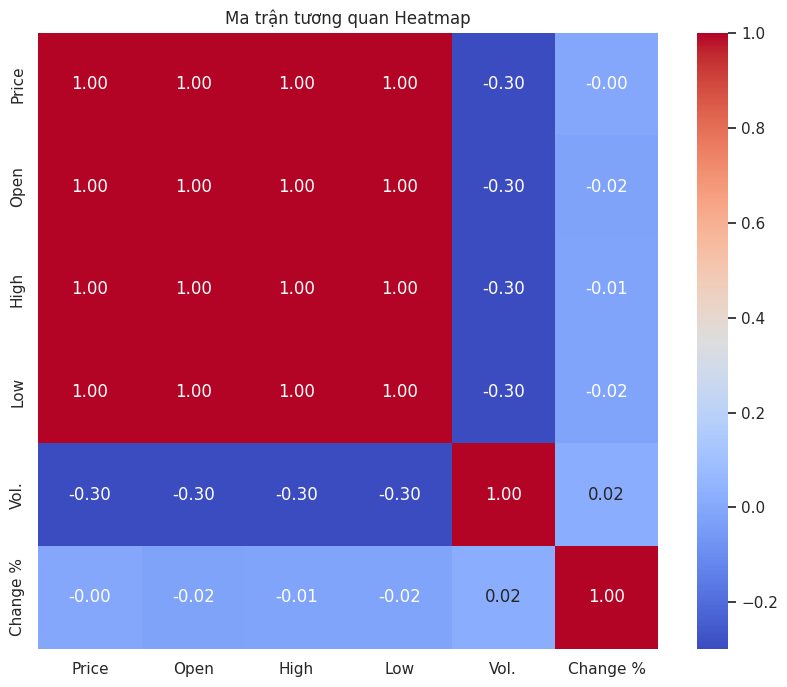


Biểu đồ 5: Tỷ lệ dữ liệu của các mã cổ phiếu


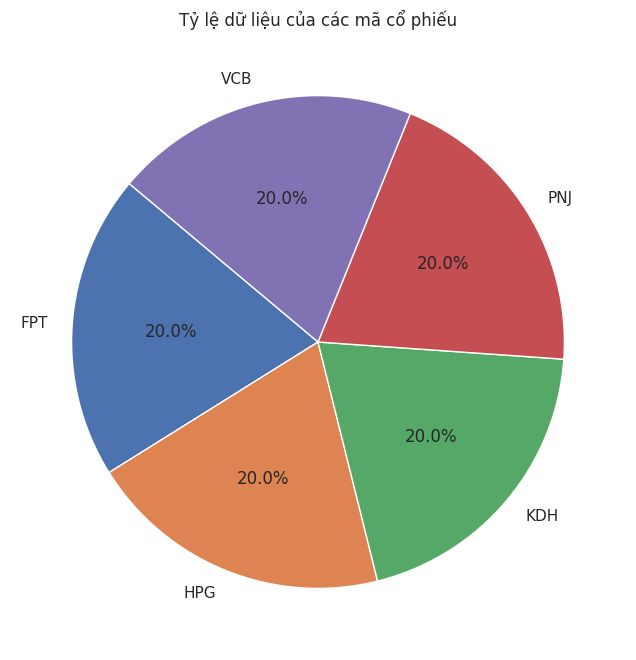


--- Hoàn thành! Các biểu đồ đã được hiển thị. ---


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tải dữ liệu từ file CSV
# Hãy chắc chắn rằng file 'cleaned_stock_data.csv' nằm cùng thư mục với notebook của bạn
try:
    df = pd.read_csv('cleaned_stock_data.csv')
    print("Tải file thành công!")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file 'cleaned_stock_data.csv'.")
    print("Vui lòng kiểm tra lại tên file và đường dẫn.")
    # Dừng thực thi nếu không có file
    exit()


# --- 1. Thống kê cơ bản ---
print("\n--- Thống kê cơ bản cho các cột dữ liệu số ---")
# Chọn các cột số để tính toán
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Tính toán và in ra các giá trị thống kê
stats = df[numeric_cols].agg(['mean', 'median', 'var', 'std']).transpose()
stats.columns = ['Trung bình (Mean)', 'Trung vị (Median)', 'Phương sai (Variance)', 'Độ lệch chuẩn (Std. Dev)']
print(stats)


# --- 2. Trực quan hóa dữ liệu ---
print("\n--- Đang hiển thị các biểu đồ... ---")

# Thiết lập style cho biểu đồ
sns.set(style="whitegrid")

# Histogram: Phân phối của giá đóng cửa (Price)
print("\nBiểu đồ 1: Phân phối giá đóng cửa")
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Phân phối của Giá đóng cửa (Price)')
plt.xlabel('Giá')
plt.ylabel('Tần suất')
plt.show() # Hiển thị biểu đồ

# Boxplot: So sánh giá (Price) giữa các mã cổ phiếu (Ticker)
print("\nBiểu đồ 2: So sánh giá giữa các mã cổ phiếu")
plt.figure(figsize=(12, 7))
sns.boxplot(x='Ticker', y='Price', data=df)
plt.title('Biểu đồ Boxplot so sánh Giá giữa các mã cổ phiếu')
plt.xlabel('Mã cổ phiếu (Ticker)')
plt.ylabel('Giá')
plt.show() # Hiển thị biểu đồ

# Scatter plot: Mối quan hệ giữa Giá (Price) và Khối lượng giao dịch (Vol.)
print("\nBiểu đồ 3: Mối quan hệ giữa Giá và Khối lượng giao dịch")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vol.', y='Price', hue='Ticker', data=df, alpha=0.6)
plt.title('Mối quan hệ giữa Giá và Khối lượng giao dịch')
plt.xlabel('Khối lượng giao dịch (Vol.)')
plt.ylabel('Giá')
plt.show() # Hiển thị biểu đồ

# Heatmap: Ma trận tương quan giữa các biến số
print("\nBiểu đồ 4: Ma trận tương quan")
plt.figure(figsize=(10, 8))
# Tính toán ma trận tương quan
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận tương quan Heatmap')
plt.show() # Hiển thị biểu đồ

# Pie chart: Tỷ lệ số lượng điểm dữ liệu của mỗi mã cổ phiếu
print("\nBiểu đồ 5: Tỷ lệ dữ liệu của các mã cổ phiếu")
plt.figure(figsize=(8, 8))
ticker_counts = df['Ticker'].value_counts()
plt.pie(ticker_counts, labels=ticker_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Tỷ lệ dữ liệu của các mã cổ phiếu')
plt.ylabel('') # Bỏ nhãn trục y
plt.show() # Hiển thị biểu đồ

print("\n--- Hoàn thành! Các biểu đồ đã được hiển thị. ---")

Đã tìm thấy các mã cổ phiếu: ['FPT', 'KDH', 'HPG', 'VCB', 'PNJ']
Bắt đầu hiển thị biểu đồ...
Đang xử lý mã: FPT...


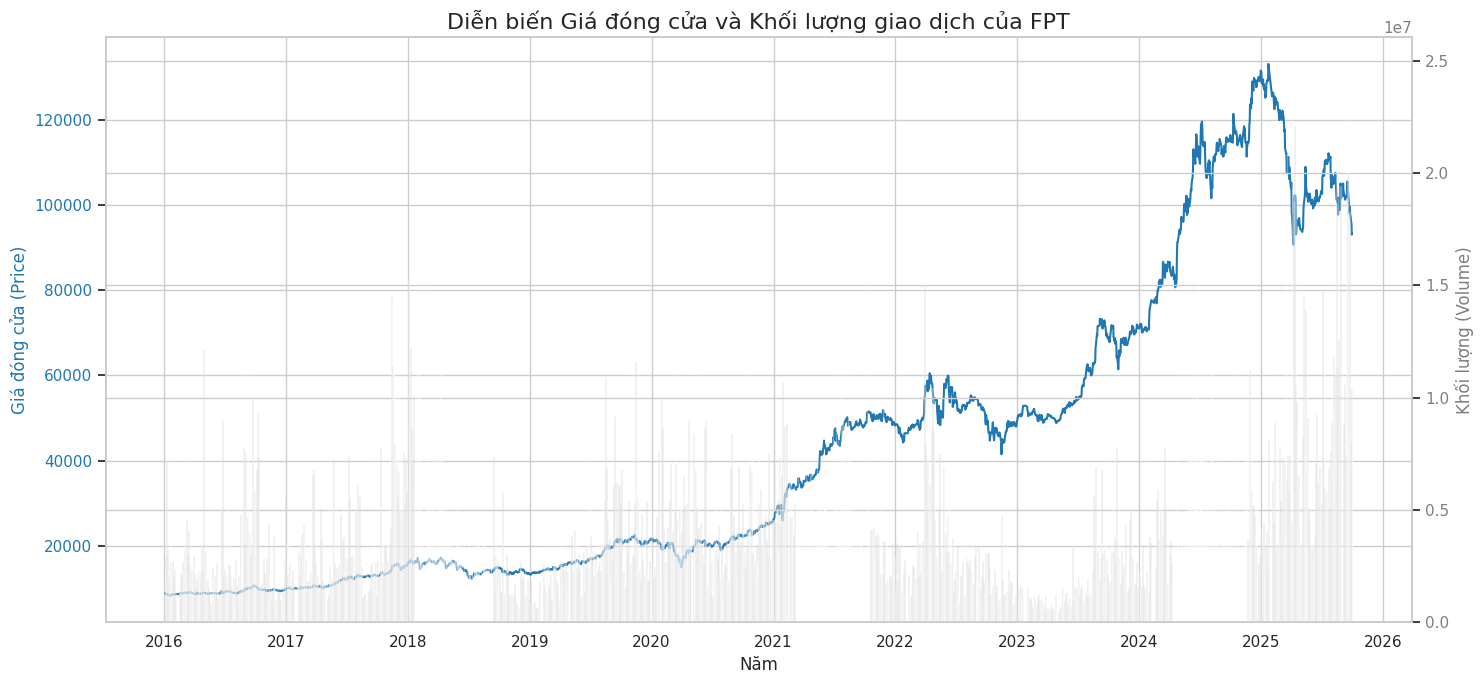

Đang xử lý mã: KDH...


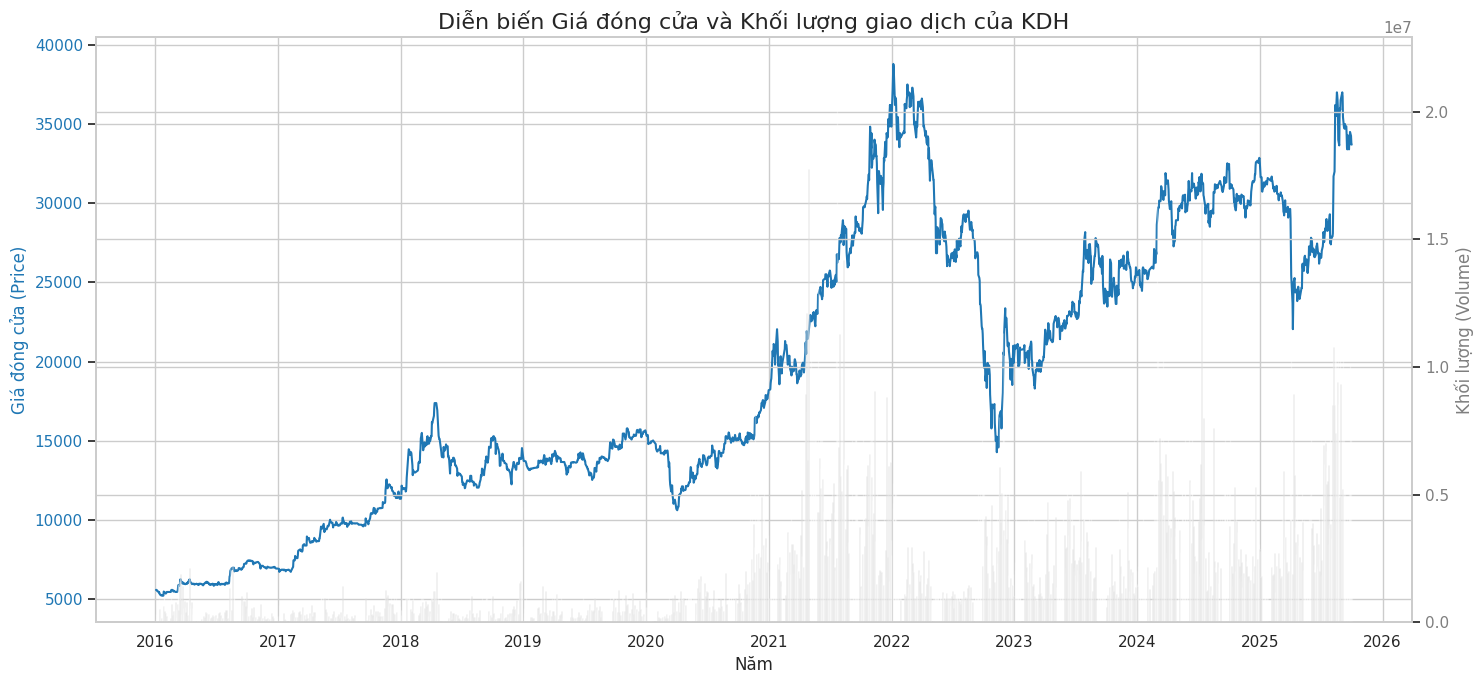

Đang xử lý mã: HPG...


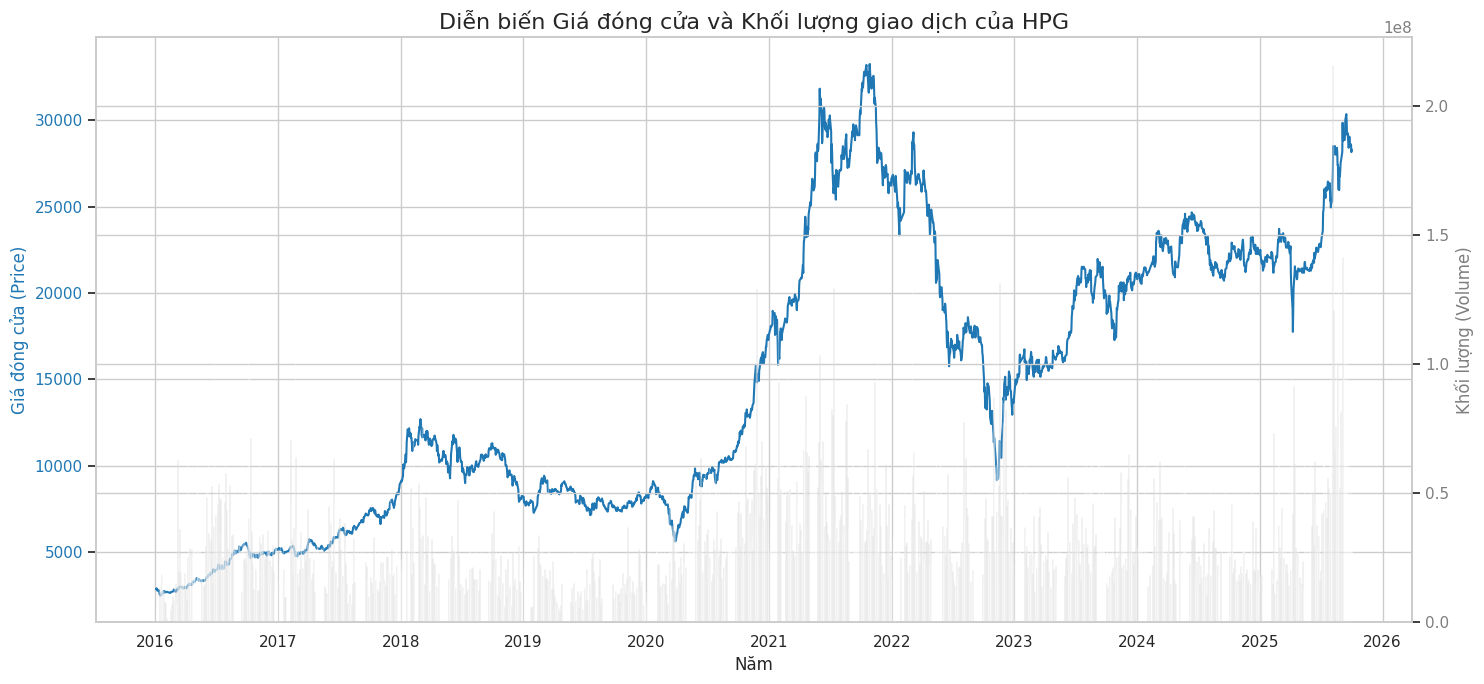

Đang xử lý mã: VCB...


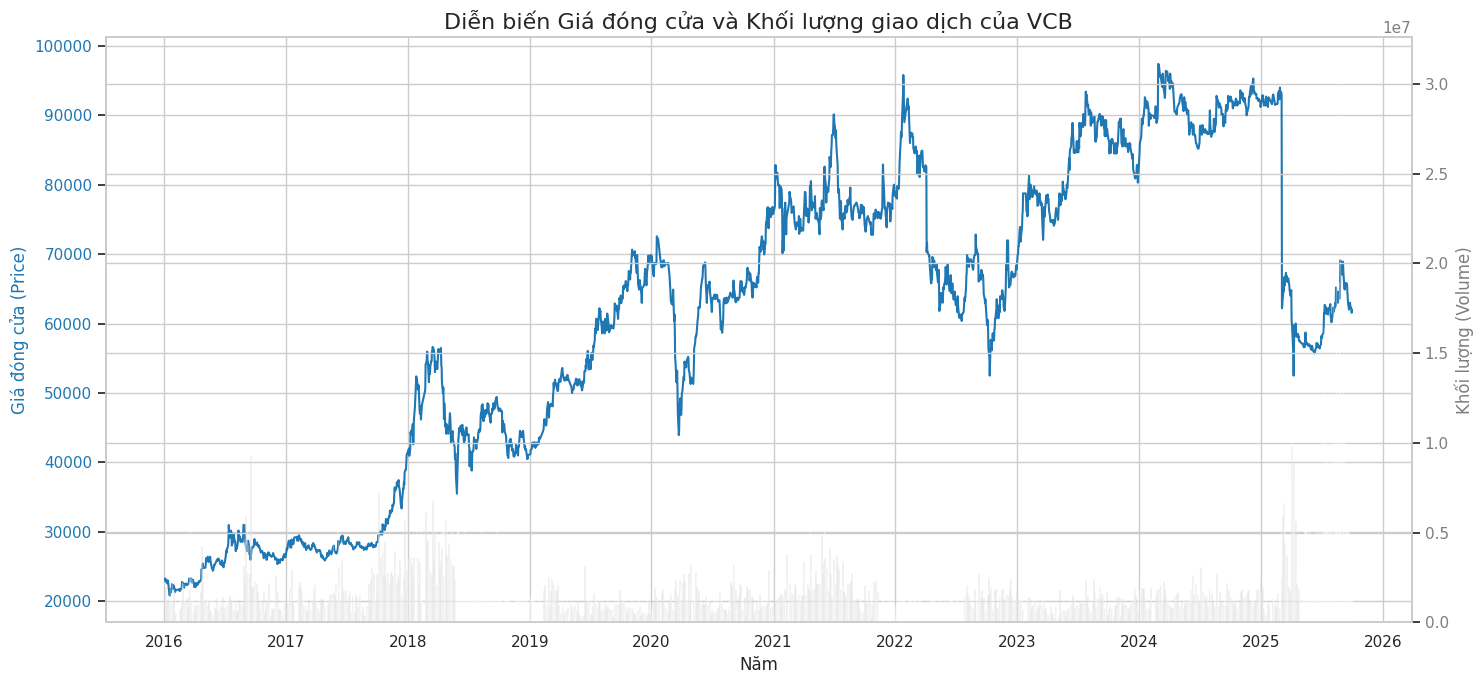

Đang xử lý mã: PNJ...


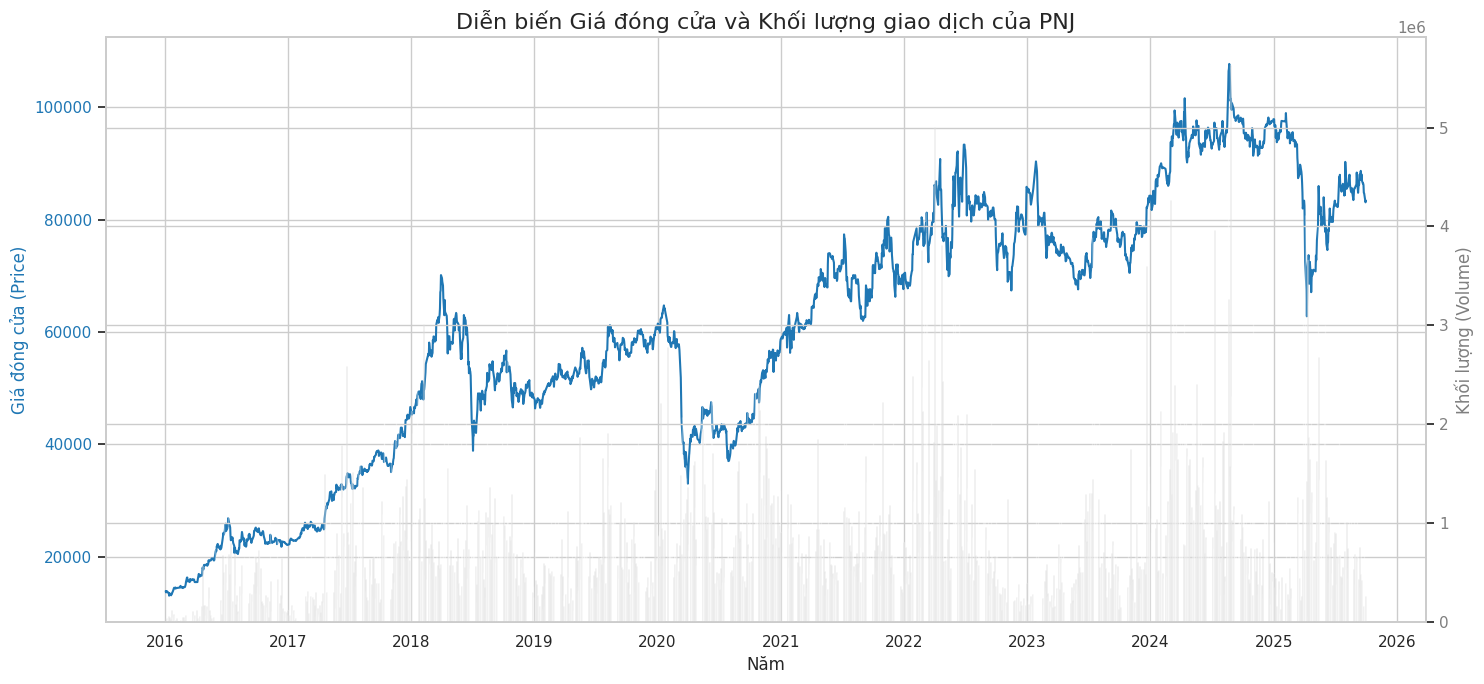


Hoàn thành! Đã hiển thị 5 biểu đồ.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- 1. Tải và chuẩn bị dữ liệu ---
try:
    # Tải dữ liệu từ file
    df = pd.read_csv('cleaned_stock_data.csv')

    # Chuyển cột 'Date' sang định dạng datetime để vẽ biểu đồ
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Sắp xếp dữ liệu theo ngày để biểu đồ vẽ đúng thứ tự
    df.sort_values('Date', inplace=True)

    # Lấy danh sách các mã cổ phiếu duy nhất có trong file
    unique_tickers = df['Ticker'].unique()
    print(f"Đã tìm thấy các mã cổ phiếu: {list(unique_tickers)}")
    print("Bắt đầu hiển thị biểu đồ...")

    # --- 2. Lặp qua từng mã cổ phiếu và vẽ biểu đồ ---
    for ticker_symbol in unique_tickers:
        
        print(f"Đang xử lý mã: {ticker_symbol}...")
        
        # Lọc dữ liệu cho mã cổ phiếu hiện tại
        df_stock = df[df['Ticker'] == ticker_symbol].copy()
        
        # Bắt đầu vẽ
        fig, ax1 = plt.subplots(figsize=(15, 7))

        # Vẽ biểu đồ đường cho Giá đóng cửa (trục tung bên trái)
        color = 'tab:blue'
        ax1.set_xlabel('Năm', fontsize=12)
        ax1.set_ylabel('Giá đóng cửa (Price)', color=color, fontsize=12)
        ax1.plot(df_stock['Date'], df_stock['Price'], color=color, label='Giá đóng cửa')
        ax1.tick_params(axis='y', labelcolor=color)

        # Tạo trục tung thứ hai chia sẻ cùng trục hoành
        ax2 = ax1.twinx()

        # Vẽ biểu đồ cột cho Khối lượng giao dịch (trục tung bên phải)
        color = 'tab:gray'
        ax2.set_ylabel('Khối lượng (Volume)', color=color, fontsize=12)
        ax2.bar(df_stock['Date'], df_stock['Vol.'], color=color, alpha=0.3, label='Khối lượng')
        ax2.tick_params(axis='y', labelcolor=color)

        # --- 3. Định dạng và hiển thị biểu đồ ---
        ax1.xaxis.set_major_locator(mdates.YearLocator())
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        
        plt.title(f'Diễn biến Giá đóng cửa và Khối lượng giao dịch của {ticker_symbol}', fontsize=16)
        fig.tight_layout()

        # Hiển thị biểu đồ trực tiếp thay vì lưu ra file
        plt.show()

    print(f"\nHoàn thành! Đã hiển thị {len(unique_tickers)} biểu đồ.")

except FileNotFoundError:
    print("Lỗi: Không tìm thấy file 'cleaned_stock_data.csv'. Vui lòng kiểm tra lại.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")

--- Dữ liệu đã được tải và chuẩn bị thành công! ---

--- Bảng thống kê cơ bản (Giá và Khối lượng) cho từng mã ---
  Ticker  mean_price  median_price  std_price  mean_volume
0    FPT    42071.91       23845.5   34426.24   3920742.34
1    HPG    14627.49       12386.4    8015.62  30755088.37
2    KDH    19118.33       15777.6    8816.25   1902699.11
3    PNJ    60496.83       60577.0   23090.84    783374.08
4    VCB    60819.07       63738.0   21886.16   1867092.69

--- Đang chuẩn bị biểu đồ so sánh... ---


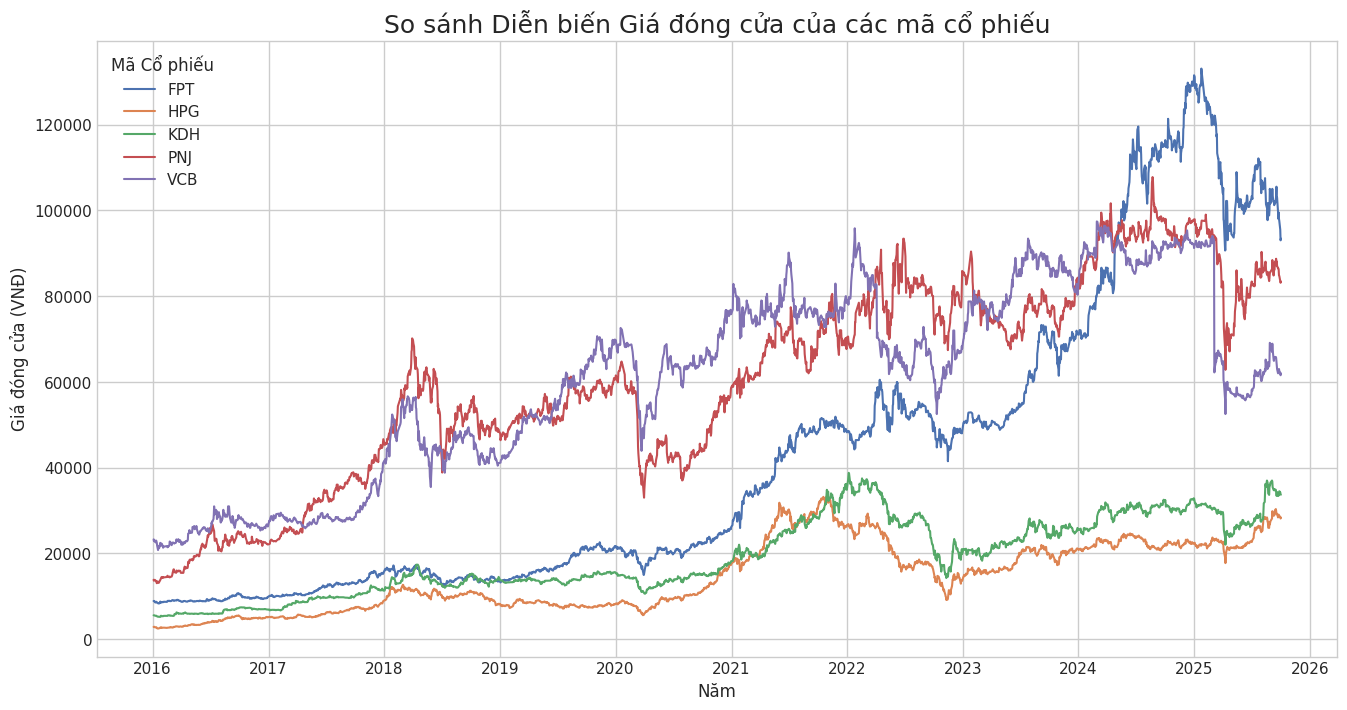

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Tải và chuẩn bị dữ liệu ---
try:
    # Tải dữ liệu từ file
    df = pd.read_csv('cleaned_stock_data.csv')

    # Chuyển cột 'Date' sang định dạng datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Sắp xếp dữ liệu theo ngày
    df.sort_values('Date', inplace=True)
    
    print("--- Dữ liệu đã được tải và chuẩn bị thành công! ---")

# --- 2. Thống kê cơ bản cho từng mã cổ phiếu ---
    print("\n--- Bảng thống kê cơ bản (Giá và Khối lượng) cho từng mã ---")
    
    # Nhóm dữ liệu theo từng mã và tính các giá trị thống kê cần thiết
    stats_df = df.groupby('Ticker')[['Price', 'Vol.']].agg(
        mean_price=('Price', 'mean'),
        median_price=('Price', 'median'),
        std_price=('Price', 'std'),
        mean_volume=('Vol.', 'mean')
    ).reset_index()
    
    # Làm tròn số liệu cho dễ đọc
    stats_df = stats_df.round(2)
    print(stats_df)


# --- 3. Vẽ biểu đồ đường so sánh giá đóng cửa của 5 mã ---
    print("\n--- Đang chuẩn bị biểu đồ so sánh... ---")
    
    # Sử dụng pivot để định dạng lại dữ liệu: mỗi cột là một mã cổ phiếu
    price_pivot_df = df.pivot(index='Date', columns='Ticker', values='Price')
    
    # Bắt đầu vẽ
    plt.style.use('seaborn-v0_8-whitegrid') # Sử dụng style cho biểu đồ đẹp hơn
    plt.figure(figsize=(16, 8))
    
    # Vẽ biểu đồ từ dữ liệu đã pivot, pandas sẽ tự động vẽ mỗi cột là 1 đường
    plt.plot(price_pivot_df)
    
    # Định dạng biểu đồ
    plt.title('Diễn biến Giá đóng cửa của các mã cổ phiếu', fontsize=18)
    plt.xlabel('Năm', fontsize=12)
    plt.ylabel('Giá đóng cửa (VNĐ)', fontsize=12)
    
    # Hiển thị chú thích (legend) để biết đường nào của mã nào
    # Lấy tên các mã từ cột của bảng pivot
    plt.legend(price_pivot_df.columns, title='Mã Cổ phiếu')
    
    # Hiển thị biểu đồ
    plt.show()

except FileNotFoundError:
    print("Lỗi: Không tìm thấy file 'cleaned_stock_data.csv'. Vui lòng kiểm tra lại.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")

--- Dữ liệu đã được tải và chuẩn bị ---

--- Đang vẽ Biểu đồ Phân phối Lợi nhuận... ---


/tmp/ipykernel_1119/1546106862.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Mã Cổ phiếu')


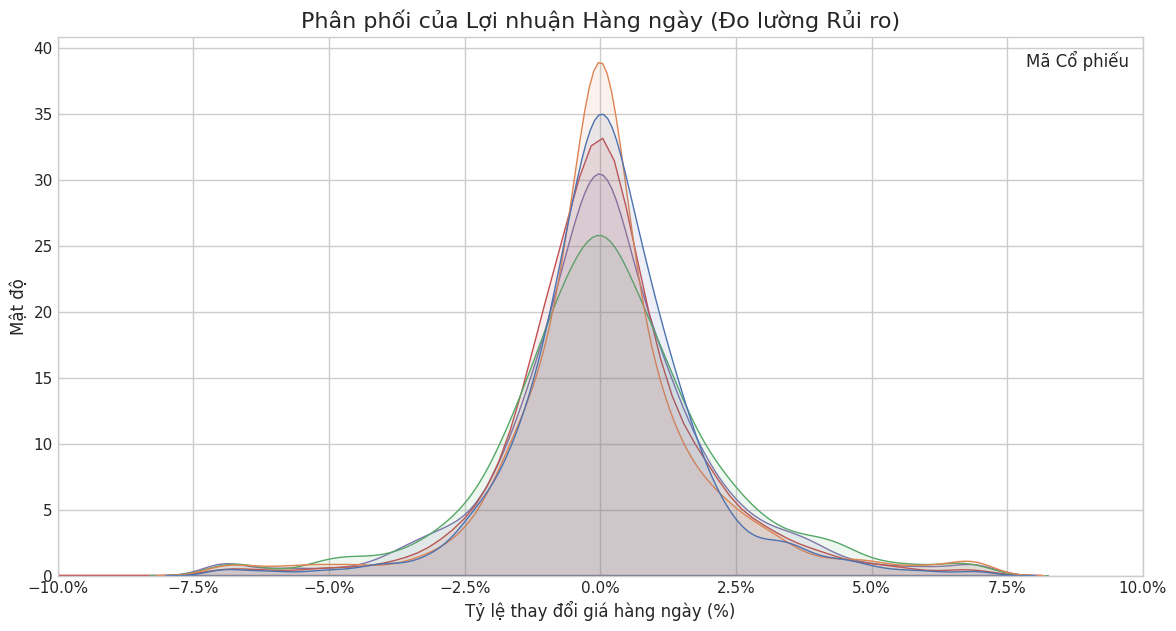


--- Đang vẽ Biểu đồ Hiệu suất Tích lũy... ---


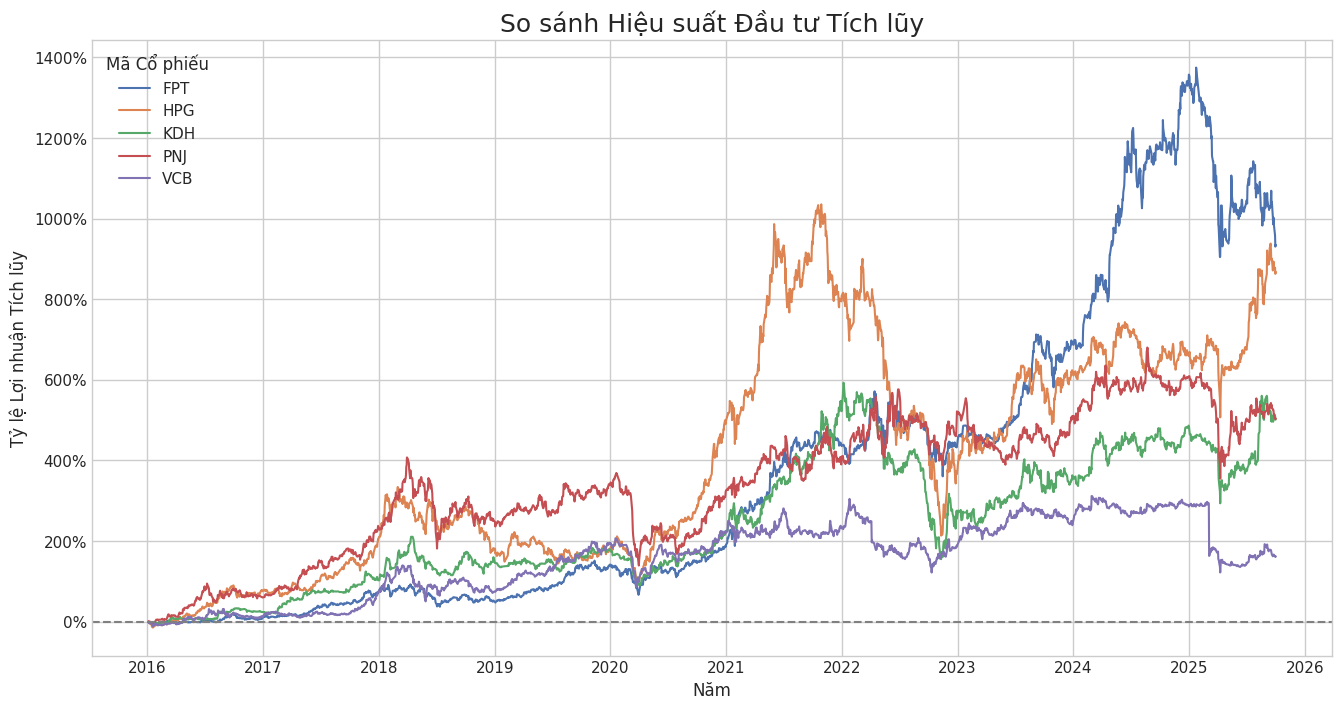

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# --- 1. Tải và chuẩn bị dữ liệu (Tương tự như trước) ---
try:
    df = pd.read_csv('cleaned_stock_data.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True)
    print("--- Dữ liệu đã được tải và chuẩn bị ---")

# --- 2. Biểu đồ Phân phối Lợi nhuận Hàng ngày (Volatility/Risk) ---
    print("\n--- Đang vẽ Biểu đồ Phân phối Lợi nhuận... ---")
    
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(14, 7))
    
    # Sử dụng Seaborn để vẽ biểu đồ mật độ (KDE) cho mỗi mã
    sns.kdeplot(data=df, x='Change %', hue='Ticker', common_norm=False, fill=True, alpha=0.1)
    
    plt.title('Phân phối của Lợi nhuận Hàng ngày (Đo lường Rủi ro)', fontsize=16)
    plt.xlabel('Tỷ lệ thay đổi giá hàng ngày (%)', fontsize=12)
    plt.ylabel('Mật độ', fontsize=12)
    plt.xlim(-0.1, 0.1) # Giới hạn trục x để dễ quan sát vùng trung tâm
    plt.gca().xaxis.set_major_formatter(PercentFormatter(1)) # Định dạng trục x thành %
    plt.legend(title='Mã Cổ phiếu')
    
    plt.show()

# --- 3. Biểu đồ Hiệu suất Tích lũy (Normalized Performance) ---
    print("\n--- Đang vẽ Biểu đồ Hiệu suất Tích lũy... ---")

    # Pivot dữ liệu Change %
    daily_returns_pivot = df.pivot(index='Date', columns='Ticker', values='Change %')
    
    # Tính toán lợi nhuận tích lũy: (1 + lợi nhuận hàng ngày).tíchlũy()
    # Giả sử bạn đầu tư 1 đồng vào ngày đầu tiên
    cumulative_returns = (1 + daily_returns_pivot).cumprod() - 1
    
    # Bắt đầu vẽ
    plt.figure(figsize=(16, 8))
    
    plt.plot(cumulative_returns)
    
    # Định dạng biểu đồ
    plt.title('So sánh Hiệu suất Đầu tư Tích lũy', fontsize=18)
    plt.xlabel('Năm', fontsize=12)
    plt.ylabel('Tỷ lệ Lợi nhuận Tích lũy', fontsize=12)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1)) # Định dạng trục y thành %
    
    # Thêm đường tham chiếu y=0 (điểm hòa vốn)
    plt.axhline(0, color='grey', linestyle='--')
    
    plt.legend(cumulative_returns.columns, title='Mã Cổ phiếu')
    
    plt.show()

except FileNotFoundError:
    print("Lỗi: Không tìm thấy file 'cleaned_stock_data.csv'.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")